## [Unsupervised Learning on Country Data](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data)

### Objective:
- To categorise the countries using socio-economic and health factors that determine the overall development of the country.


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Data Dictionary:
- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports: Exports of goods and services per capita. Given as %age of the GDP per capita
- health : Total health spending per capita. Given as %age of GDP per capita
- imports: Imports of goods and services per capita. Given as %age of the GDP per capita
- Income: Net income per person
- Inflation: The measurement of the annual growth rate of the Total GDP
- life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

In [3]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### EDA

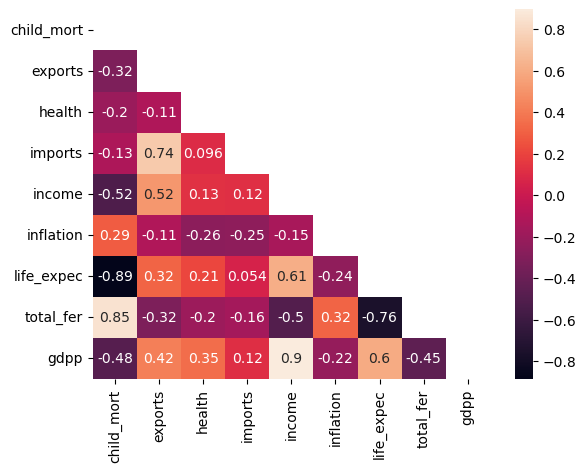

In [4]:
def plot_masked_heatmap(df):
    mask = np.triu(np.ones_like(df.select_dtypes(include='number').corr()))
    plot = sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, mask=mask)

plot_masked_heatmap(data)

- Some of the fetures are highly correlated, we might need to combine or drop some of them.

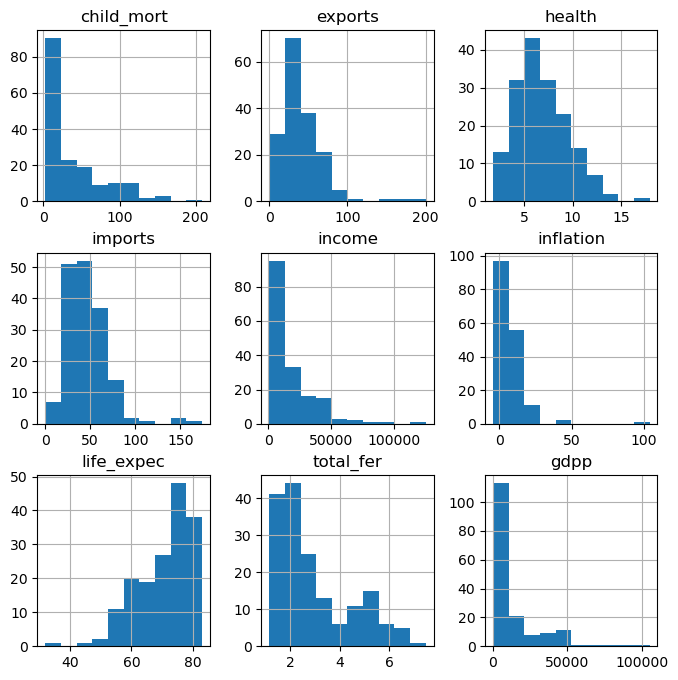

In [5]:
data.hist(figsize=(8,8));

- Almost all the features are skewed, except health is normally distributed.

<Axes: xlabel='imports', ylabel='exports'>

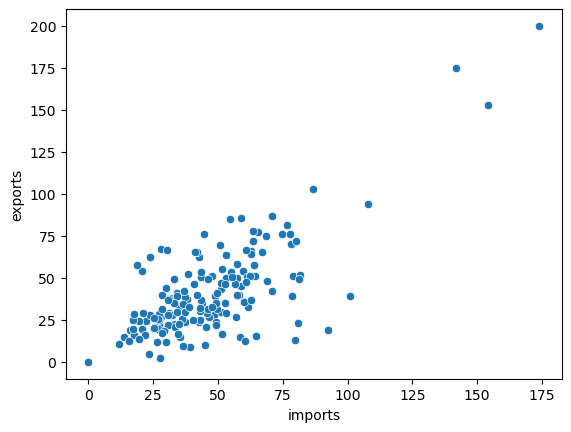

In [6]:
sns.scatterplot(x='imports', y='exports', data=data)

- Maybe we can create continent column and add it to the viz. 

In [7]:
data['country'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [8]:
country_to_continent = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cape Verde': 'Africa',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo, Dem. Rep.': 'Africa',
    'Congo, Rep.': 'Africa',
    'Costa Rica': 'North America',
    "Cote d'Ivoire": 'Africa',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyz Republic': 'Asia',
    'Lao': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macedonia, FYR': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Micronesia, Fed. Sts.': 'Oceania',
    'Moldova': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Qatar': 'Asia',
    'Romania': 'Europe',
    'Russia': 'Europe/Asia',
    'Rwanda': 'Africa',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'South Africa': 'Africa',
    'South Korea': 'Asia',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'St. Vincent and the Grenadines': 'North America',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tajikistan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Tunisia': 'Africa',
    'Turkey': 'Europe/Asia',
    'Turkmenistan': 'Asia',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela': 'South America',
    'Vietnam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa'
}


In [9]:
data['continent'] = data['country'].map(country_to_continent)


In [10]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Asia
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Europe
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Africa
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Africa
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,North America


<Axes: xlabel='imports', ylabel='exports'>

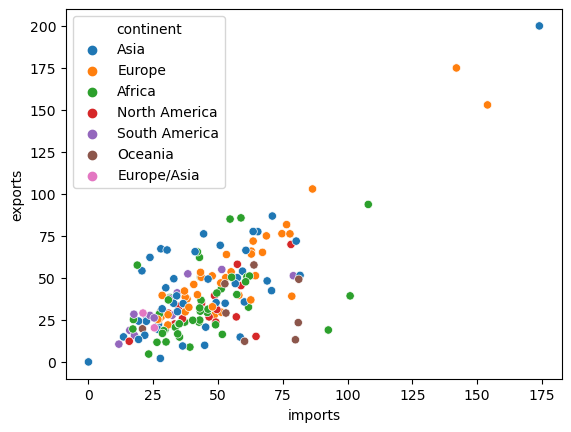

In [11]:
sns.scatterplot(x='imports', y='exports', hue='continent', data=data)

In [12]:
data[data['imports'] == data['imports'].max()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,Asia


In [13]:
data[data['imports'] == data['imports'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988,Asia


- Asia has the highest import/export country which is **Singapore** and also the lowes import/export country which is **Myanmar**.

<Axes: xlabel='child_mort', ylabel='life_expec'>

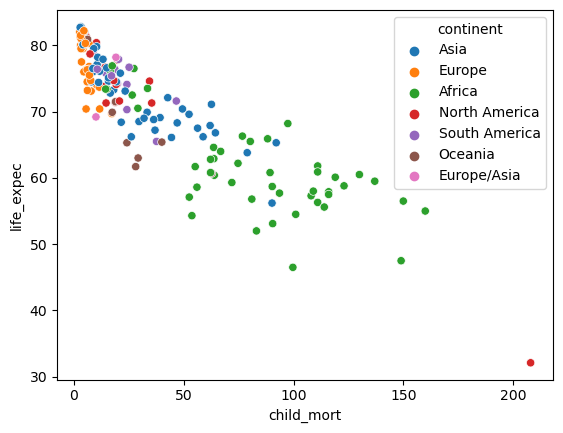

In [14]:
sns.scatterplot(x='child_mort', y='life_expec', hue='continent', data=data)

- We can see that the African nations on average have high child mortiality rate and low life expectancy. Even though the lowest life expectancy rate is in North America.

In [15]:
data[data['life_expec'] == data['life_expec'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,North America


In [16]:
data[data['life_expec'] == data['life_expec'].max()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
77,Japan,3.2,15.0,9.49,13.6,35800,-1.9,82.8,1.39,44500,Asia


- **Haiti** has the lowest life expectency while **Japan** has the highest.

<Axes: xlabel='income', ylabel='gdpp'>

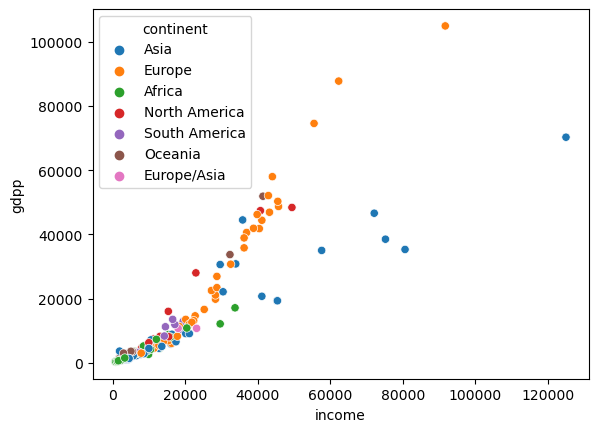

In [17]:
sns.scatterplot(x='income', y='gdpp', hue='continent', data=data)

In [18]:
data[data['income'] == data['income'].max()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300,Asia


In [19]:
data[data['gdpp'] == data['gdpp'].max()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000,Europe


- **Qatar** has the highest income while **Luxembourg** has the highest gdp.

In [20]:
data[data['income'] == data['income'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.8,57.5,6.54,334,Africa


In [21]:
data[data['gdpp'] == data['gdpp'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
26,Burundi,93.6,8.92,11.6,39.2,764,12.3,57.7,6.26,231,Africa


- The lowest countries in income and gdp are in Africa; **Congo, Dem. Rep.**, **Burundi**.

In [22]:
def plot_continent_groupby_average(df, column_to_average):
    df.drop('country', axis=1).groupby('continent').mean().sort_values(by=column_to_average,
                                                                         ascending=True)[column_to_average].plot(kind='barh');
    plt.title('Average {} per Continent'.format(column_to_average.upper()));
    plt.xlabel('Continent');
    plt.ylabel('Average {}'.format(column_to_average.upper()));

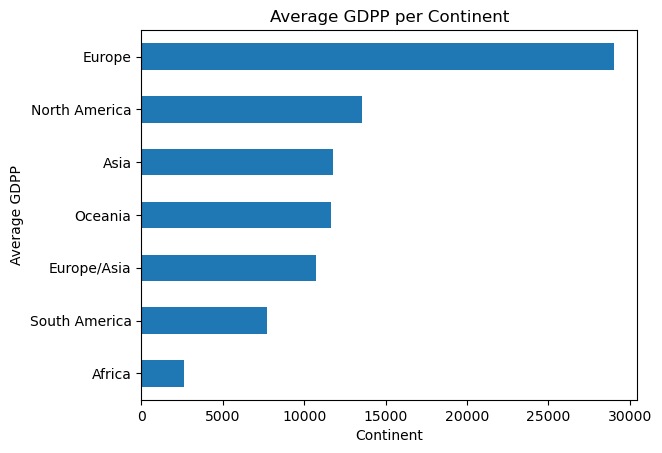

In [23]:
plot_continent_groupby_average(data, 'gdpp')

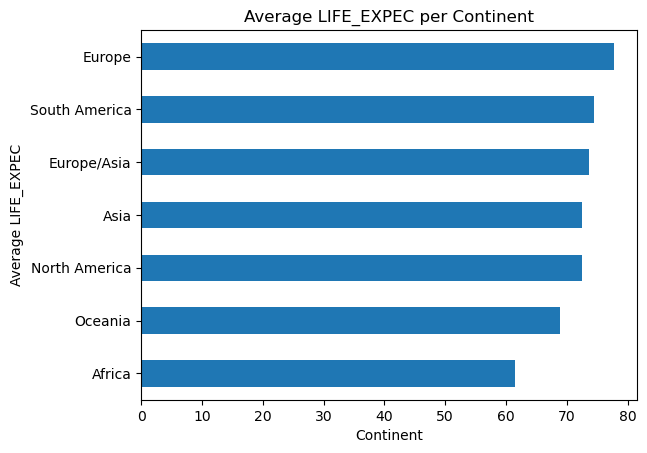

In [24]:
plot_continent_groupby_average(data, 'life_expec')

- **Europe** by far has the highest gdp and also the highest in life expectancy.

In [25]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Asia
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Europe
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Africa
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Africa
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,North America


In [26]:
#checkpoint for data
df1 = data.copy()

In [27]:
#Dropping country and continent before modeling
df1.drop(['country','continent'], axis=1, inplace=True)

In [28]:
df1.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


##### Scaling the data using StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

In [30]:
scaled_features = scaler.fit_transform(df1)

In [31]:
scaled_df = pd.DataFrame(scaled_features, columns=df1.columns)
scaled_df.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623


In [32]:
def plot_elbow(df):
    inertia = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, random_state = 42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
def plot_silhoute_score(df):
    silhouette_scores = []
    k_values = range(2, 11)

    for i in k_values:
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(df)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(df, labels))

    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Different Numbers of Clusters')
    plt.show()
    
def plot_tsne(df, cluster_labels):
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(scaled_df)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap="viridis")
    plt.title("T-SNE Visualization of Clusters")
    plt.xlabel("First T-SNE component")
    plt.ylabel("Second T-SNE component")
    plt.show()

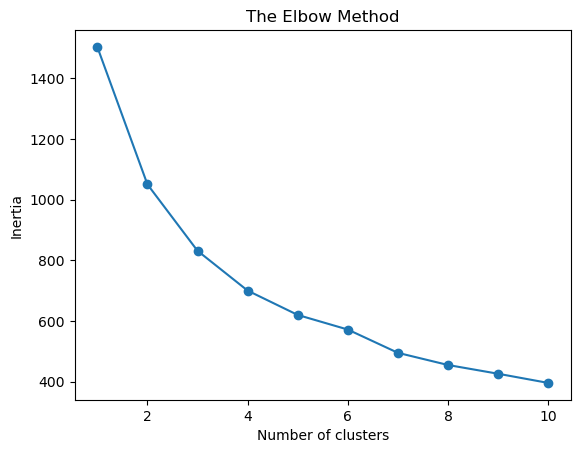

In [33]:
plot_elbow(scaled_df)

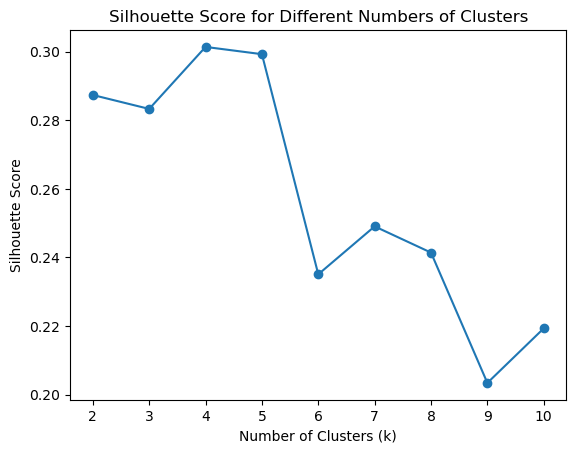

In [34]:
plot_silhoute_score(scaled_df)

- We could choose 4 or 5 as the number or clusters.

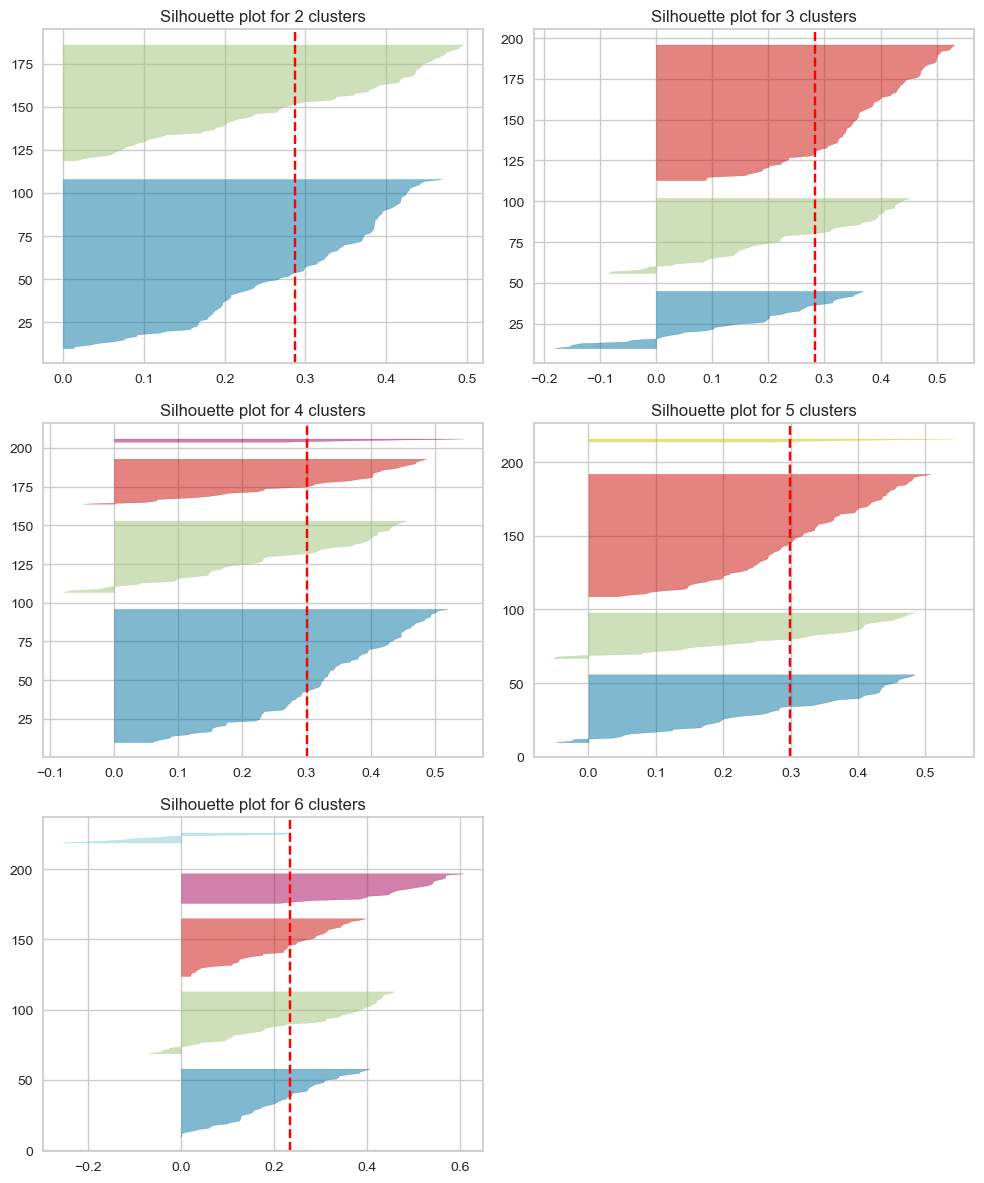

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer

k_values = range(2, 7)

fig, ax = plt.subplots(3, 2, figsize=(10, 12))
ax = ax.flatten()

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[i])
    visualizer.fit(scaled_df)
    ax[i].set_title(f"Silhouette plot for {k} clusters")

if len(k_values) < len(ax):
    for j in range(len(k_values), len(ax)):
        fig.delaxes(ax[j])
        
plt.tight_layout()
plt.show()


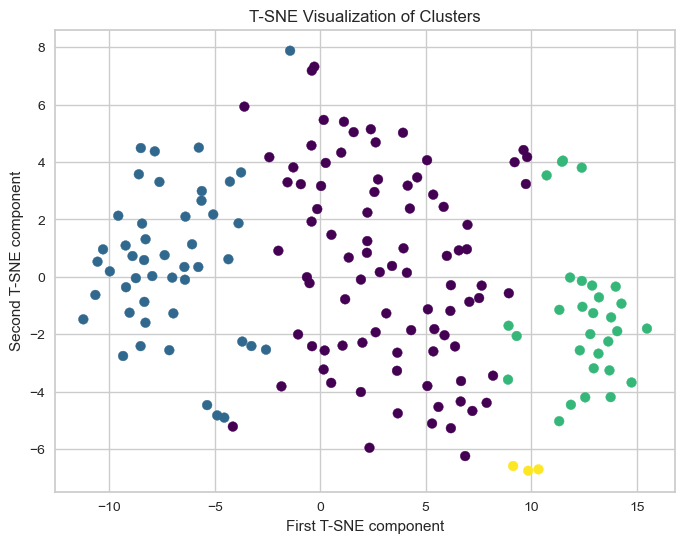

In [36]:
from sklearn.manifold import TSNE

km_model = KMeans(n_clusters=4, random_state=42)
cluster_labels = km_model.fit_predict(scaled_df)

plot_tsne(scaled_df, cluster_labels)

In [37]:
km_model.inertia_

700.3229986404375

##### Re-scaling the data using MinMax

In [38]:
df1.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [39]:
def normalize_by_minmax(df):
    mm_scaler = MinMaxScaler()
    X_mm_scaled = mm_scaler.fit_transform(df)
    return X_mm_scaled

X_mm_scaled = normalize_by_minmax(df1)

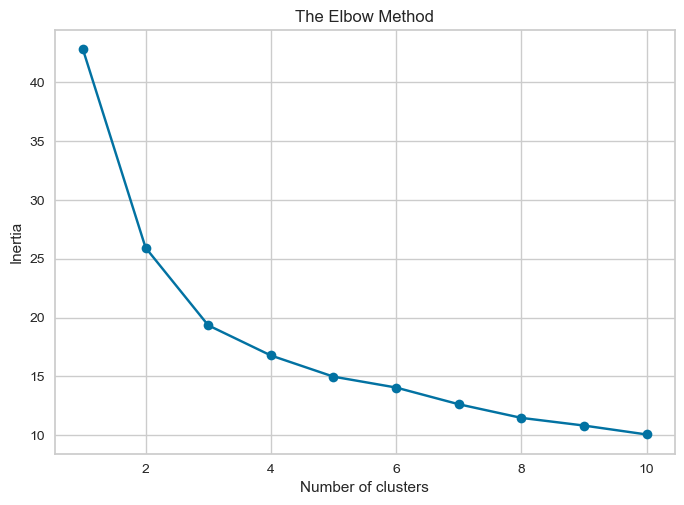

In [40]:
plot_elbow(X_mm_scaled)

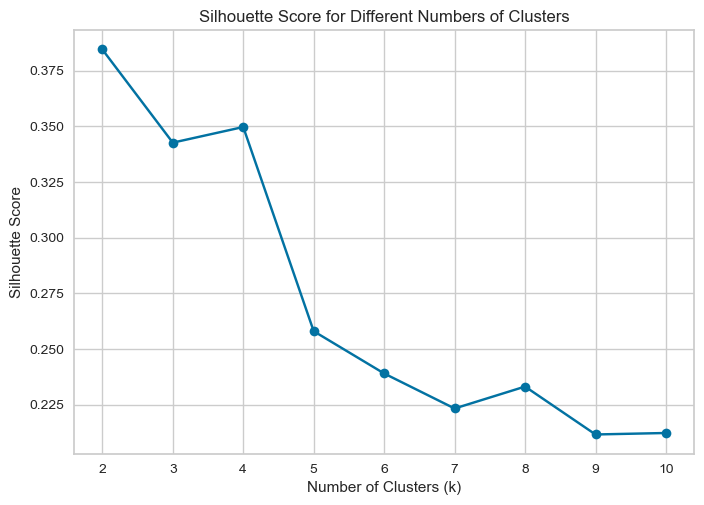

In [41]:
plot_silhoute_score(X_mm_scaled)

In [42]:
km_model2 = KMeans(n_clusters=4, random_state=42)
cluster_labels = km_model2.fit_predict(X_mm_scaled)

In [43]:
km_model2.inertia_

16.781002591696126

In [44]:
silhouette_avg = silhouette_score(X_mm_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.34967581498248707


- We're probably going to stick with MinMaxScaler as the inertia dropped from 300 to 16.

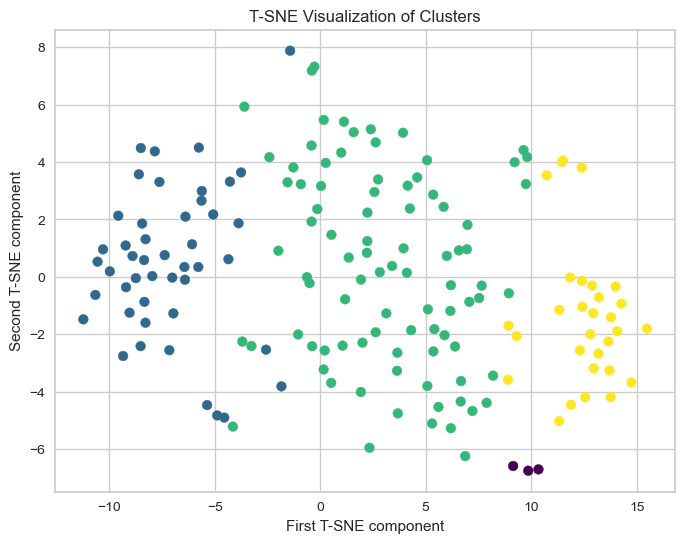

In [45]:
plot_tsne(X_mm_scaled, cluster_labels)

- We'll try different models.

### DBSCAN

In [46]:
from sklearn.cluster import DBSCAN

db_model = DBSCAN(eps=.6, min_samples=10)
labels = db_model.fit_predict(X_mm_scaled)

In [47]:
silhouette_avg = silhouette_score(X_mm_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5335170288864965


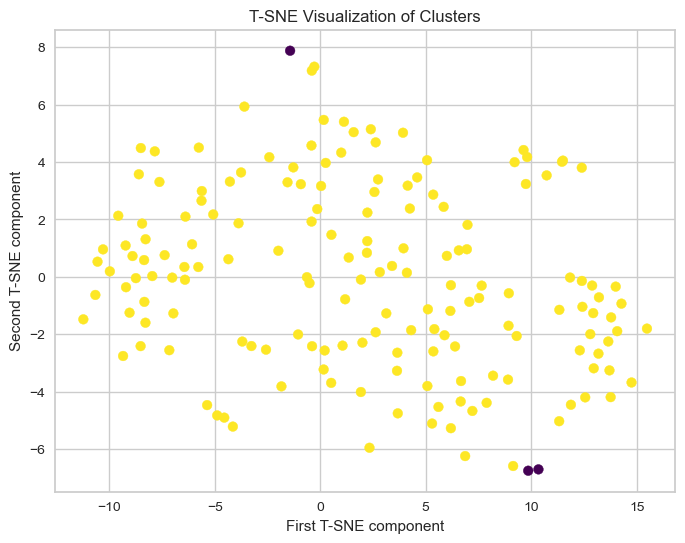

In [48]:
plot_tsne(X_mm_scaled,labels)

In [49]:
np.unique(labels)

array([-1,  0], dtype=int64)

- Looks like there's only one big cluster and some outliers.

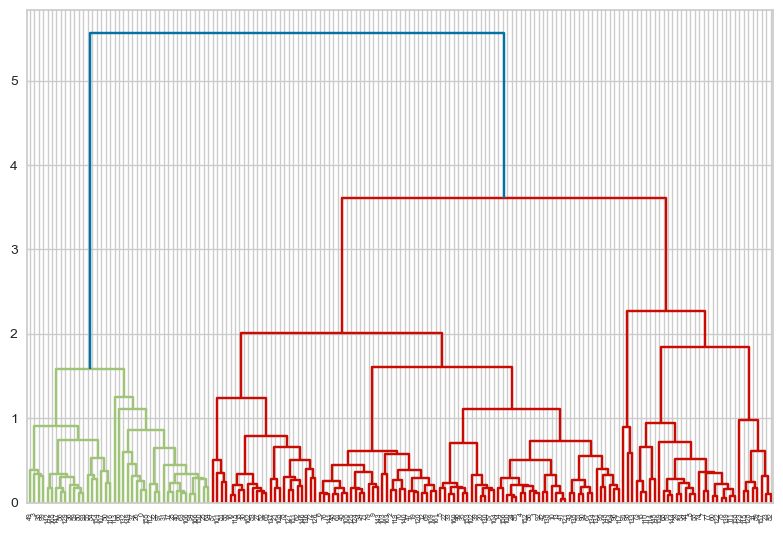

In [50]:
#visualizing a dendrogram of the data
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_data = linkage(X_mm_scaled, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

- Based on euclidean distance and the dendrogram above, 3 clusters is probably the best approach even though four or five might also be a good solution.

In [51]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Asia
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Europe
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Africa
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Africa
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,North America


In [52]:
data[data['continent']=='Europe/Asia']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
125,Russia,10.0,29.2,5.08,21.1,23100,14.20,69.2,1.57,10700,Europe/Asia
153,Turkey,19.1,20.4,6.74,25.5,18000,7.01,78.2,2.15,10700,Europe/Asia


In [53]:
data['continent'].value_counts()

continent
Africa           47
Asia             44
Europe           38
North America    15
South America    12
Oceania           9
Europe/Asia       2
Name: count, dtype: int64

### Hierarchical Clustering

In [86]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3 # Based on the dendrogram

hier_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = hier_model.fit_predict(X_mm_scaled)

In [87]:
silhouette_sc = silhouette_score(X_mm_scaled, labels)
print('Silhouette Score: ', silhouette_sc)

Silhouette Score:  0.31627506051649634


### GMM

In [56]:
from sklearn.mixture import GaussianMixture

gmm_model = GaussianMixture(n_components=4, random_state=42)
gmm_labels_scaled = gmm_model.fit_predict(scaled_df) #trying first with the scaled data

In [57]:
silhouette_sc = silhouette_score(scaled_df, gmm_labels_scaled)
print('Silhouette Score: ', silhouette_sc)

Silhouette Score:  0.10601276668935121


In [58]:
gmm_labels_normalized = gmm_model.fit_predict(X_mm_scaled) #trying with the normalized data

In [59]:
silhouette_sc = silhouette_score(X_mm_scaled, gmm_labels_normalized)
print('Silhouette Score: ', silhouette_sc)

Silhouette Score:  0.13383257487545555


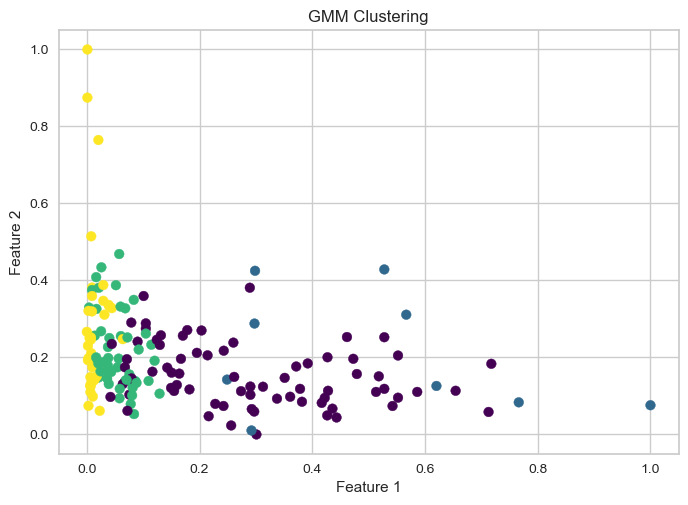

In [60]:
# Visualize clusters using a scatter plot
plt.scatter(X_mm_scaled[:, 0], X_mm_scaled[:, 1], c=gmm_labels_normalized, cmap='viridis', marker='o')
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


###### So far
- DBSCAN is the higher silhouette score but it didn't really cluster the data as it threw all the points in one big cluster and some outliers.
- We probably could work on feature engineering, maybe combine some features together or drop some..

In [61]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


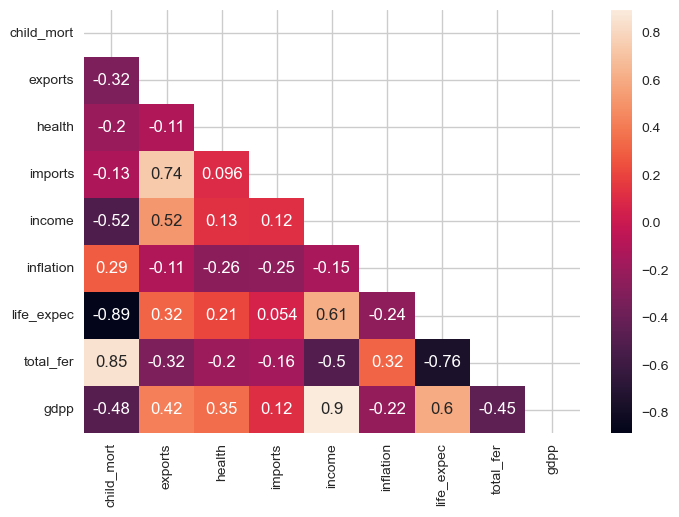

In [62]:
plot_masked_heatmap(df1)

- We'll create the following new features:
    - **life**: we'll take the average of **child mortality, life expectancy and total fertility**.
    - **trade**: we'll take the average of **imports and exports**.
    - **economy**: we'll take the average of **income, gdp per capita and inflation**.

<Axes: xlabel='child_mort', ylabel='total_fer'>

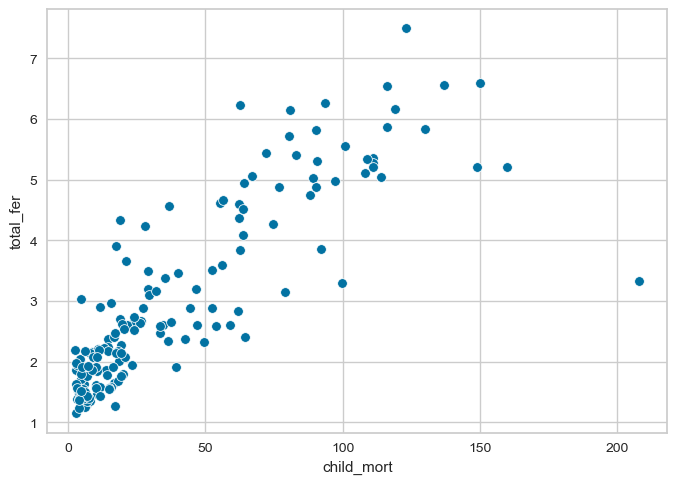

In [63]:
sns.scatterplot(x='child_mort', y='total_fer', data=data)

In [64]:
def extract_new_features(df):
    '''Extracts new features and drops the unnecessary and used ones.'''
    
    df['life'] = (df['child_mort'] + df['life_expec'] + df['total_fer']) /3
    df['trade'] = (df['imports'] + df['exports']) / 2
    df['economy'] = (df['income'] + df['gdpp'] + df['inflation']) /3
    df = df.drop(['child_mort', 'exports', 'health', 'imports', 'income',
                    'inflation', 'life_expec', 'total_fer', 'gdpp'], axis=1)
    return df

In [65]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Asia
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Europe


In [66]:
df2 = extract_new_features(data)
df2.head()

,country,continent,life,trade,economy
0,Afghanistan,Asia,50.740000,27.45,724.146667
1,Albania,Europe,31.516667,38.30,4674.830000
2,Algeria,Africa,35.563333,34.90,5792.033333
3,Angola,Africa,61.753333,52.60,3150.800000
4,Antigua and Barbuda,North America,29.743333,52.20,10433.813333


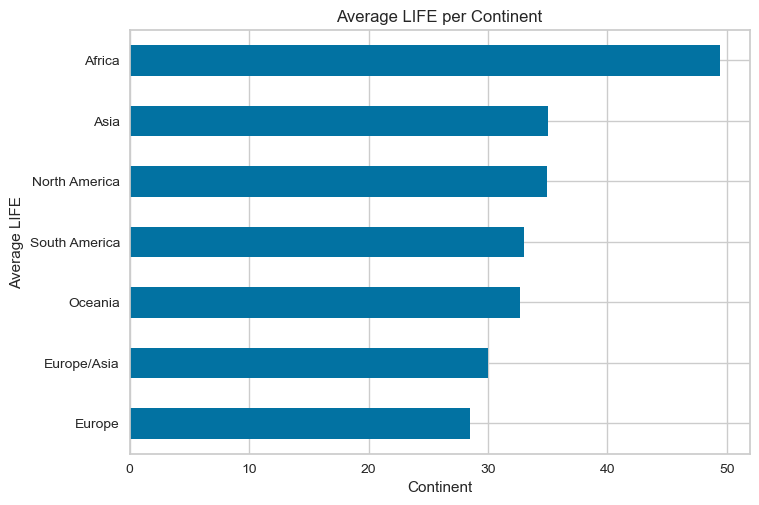

In [67]:
plot_continent_groupby_average(df2, 'life') 

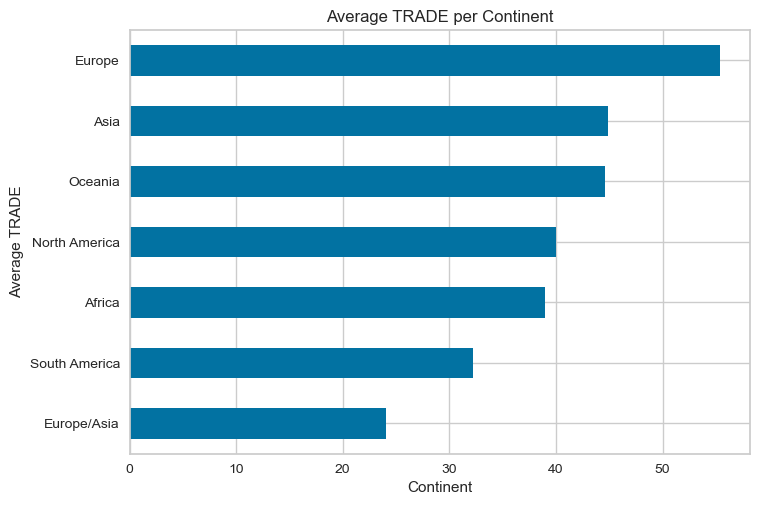

In [68]:
plot_continent_groupby_average(df2, 'trade') 

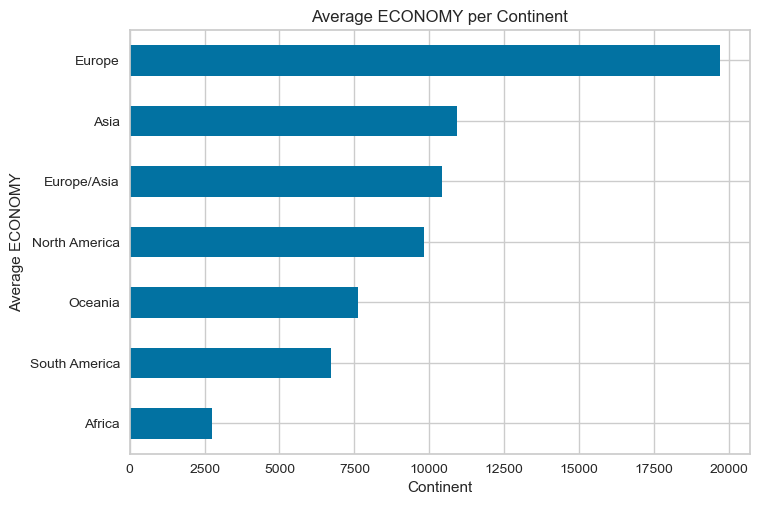

In [69]:
plot_continent_groupby_average(df2, 'economy') 

In [82]:
df2 = df2.drop(['country', 'continent'], axis=1)

In [83]:
km_model3 = KMeans(n_clusters=3)
X = normalize_by_minmax(df2)
cluster_labels = km_model3.fit_predict(X)

In [93]:
silhouette_sc = silhouette_score(X, cluster_labels)
print('Silhouette Score: ', silhouette_sc)

Silhouette Score:  0.4571609123337096


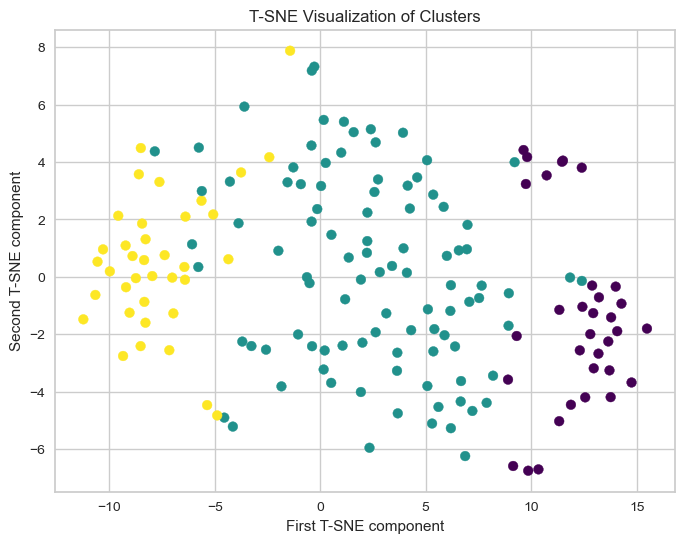

In [84]:
plot_tsne(X, cluster_labels)

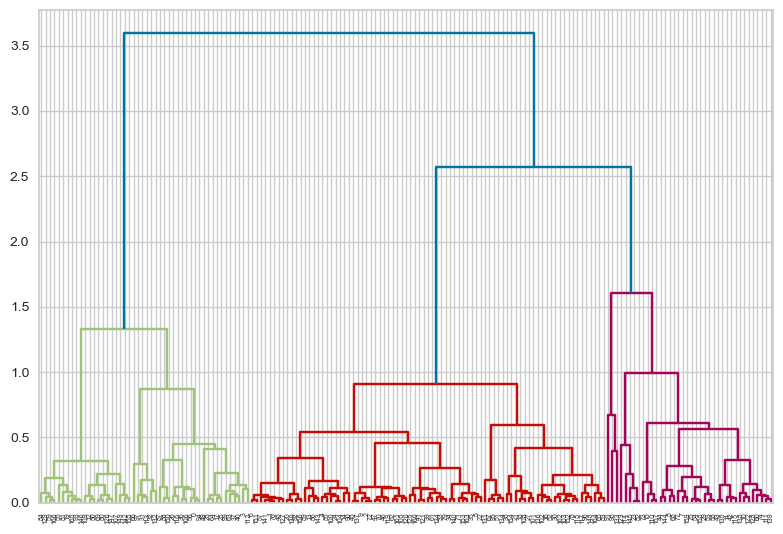

In [85]:
linkage_data = linkage(X, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [91]:
hier_model2 = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = hier_model2.fit_predict(X)
silhouette_sc = silhouette_score(X, labels)
print('Silhouette Score: ', silhouette_sc)

Silhouette Score:  0.4311472427532175


In [92]:
labels

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int64)

In [95]:
data['labels'] = labels

In [104]:
data[data['child_mort']==data['child_mort'].max()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent,life,trade,economy,labels
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,North America,81.143333,40.0,722.483333,1


- Group 1 needs help the most.
- Group 0 doeasn't need help.
- Group 2 may need help.

In [107]:
data['labels'] = data['labels'].map({0: 'no_help_needed', 1: 'urgent_help_needed', 2: 'doing_well'})

In [108]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent,life,trade,economy,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Asia,50.740000,27.45,724.146667,urgent_help_needed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Europe,31.516667,38.30,4674.830000,doing_well
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Africa,35.563333,34.90,5792.033333,doing_well
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Africa,61.753333,52.60,3150.800000,urgent_help_needed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,North America,29.743333,52.20,10433.813333,doing_well


In [115]:
import plotly.express as px

px.choropleth(data[['country','labels']], locationmode = 'country names', locations = 'country',
              title = 'countries that need help', color = data['labels'], 
              color_discrete_map = {'urgent_help_needed':'Red',
                                    'no_help_needed':'Green',
                                    'doing_well':'Yellow'} )